In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
raw_market = pd.read_pickle('ryu_new_mktcap6_1.pickle')
raw_price = pd.read_pickle('ryu_new_price6.pickle')
raw_vol = pd.read_pickle("ryu_new_volume6.pickle")

raw_market.index = pd.to_datetime(raw_market.index)
raw_price.index = pd.to_datetime(raw_price.index)

In [20]:
# masked_mktcap = raw_market[marketcap_moving_average>1_000_000]
# masked_price = raw_price[marketcap_moving_average>1_000_000]

masked_mktcap = raw_market[raw_market>1_000_000]
masked_price = raw_price[raw_market>1_000_000] 

In [21]:
# effect_of_shares = raw_market / (raw_market.shift(1)*(1+raw_price.pct_change()))
# effect_of_shares = effect_of_shares -1

effect_of_shares = masked_mktcap / (masked_mktcap.shift(1)*(1+masked_price.pct_change(fill_method=None)))
effect_of_shares = effect_of_shares -1

In [22]:
for i, val in enumerate(effect_of_shares.max()):
    if np.abs(val) > 10000:
        print(effect_of_shares.columns[i], val)

In [23]:
problems = []
for i,val in enumerate(effect_of_shares.sum()):
    if np.abs(val) > 1000:
        problems.append(effect_of_shares.columns[i])
    elif val < -0.9:
        problems.append(effect_of_shares.columns[i])
print(len(problems))

3


In [24]:
problems

['PAC', 'PROC', 'SNOV']

In [8]:
clean_mktcap = raw_market.drop(problems, axis=1)
clean_price = raw_price.drop(problems, axis=1)
clean_vol = raw_vol.drop(problems, axis=1)

In [80]:
# problems2 = []
# for i, val in enumerate(masked_mktcap.pct_change().max()):
#     if val > 10000:
#         problems2.append(masked_mktcap.columns[i])
#         #print(clean_mktcap.columns[i], val)

# clean_mktcap = clean_mktcap.drop(problems2, axis=1)
# clean_price = clean_price.drop(problems2, axis=1)

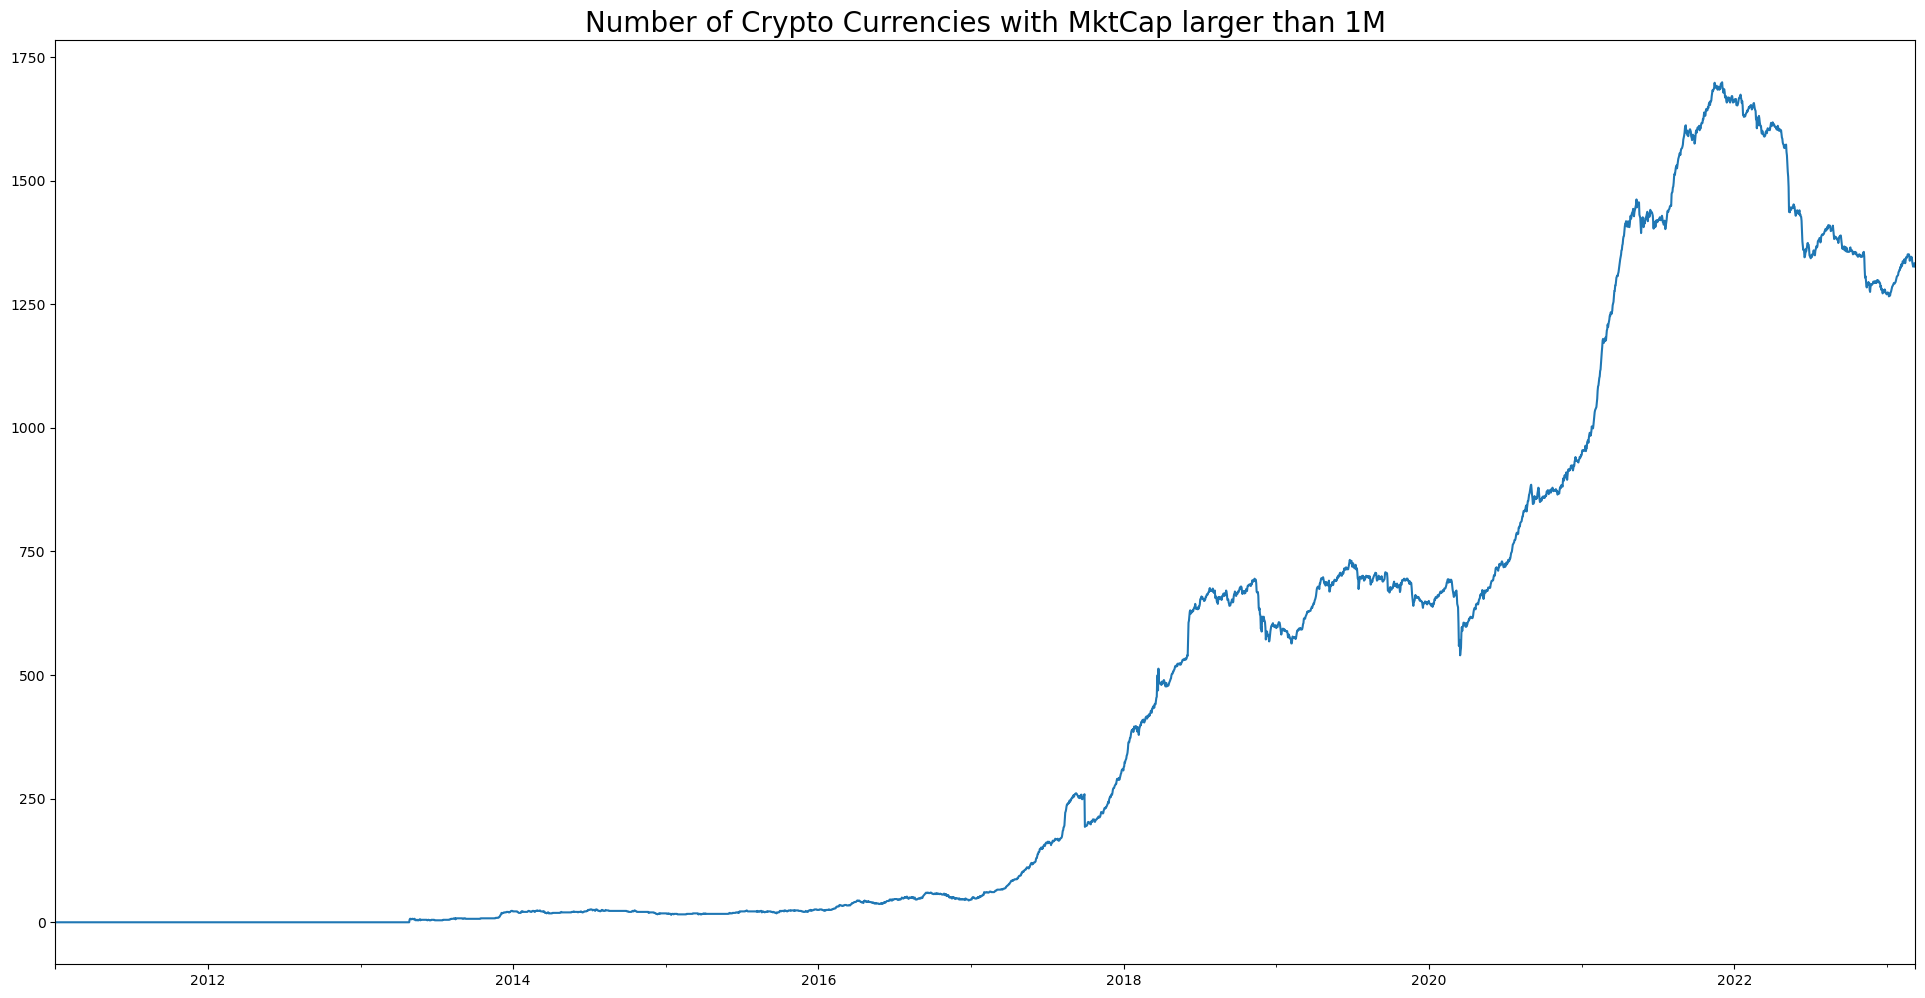

In [9]:
plt.figure()
plt.title("Number of Crypto Currencies with MktCap larger than 1M", size=20)
masked_mktcap.count(1).plot(figsize=(24,12));

In [82]:
clean_mktcap_moving_average = clean_mktcap.rolling(20).mean()
clean_mktcap = clean_mktcap[clean_mktcap_moving_average>1_000_000]
clean_price = clean_price[clean_mktcap_moving_average>1_000_000]

<AxesSubplot:title={'center':'Number of Crypto Currencies with MktCap larger than 1M'}>

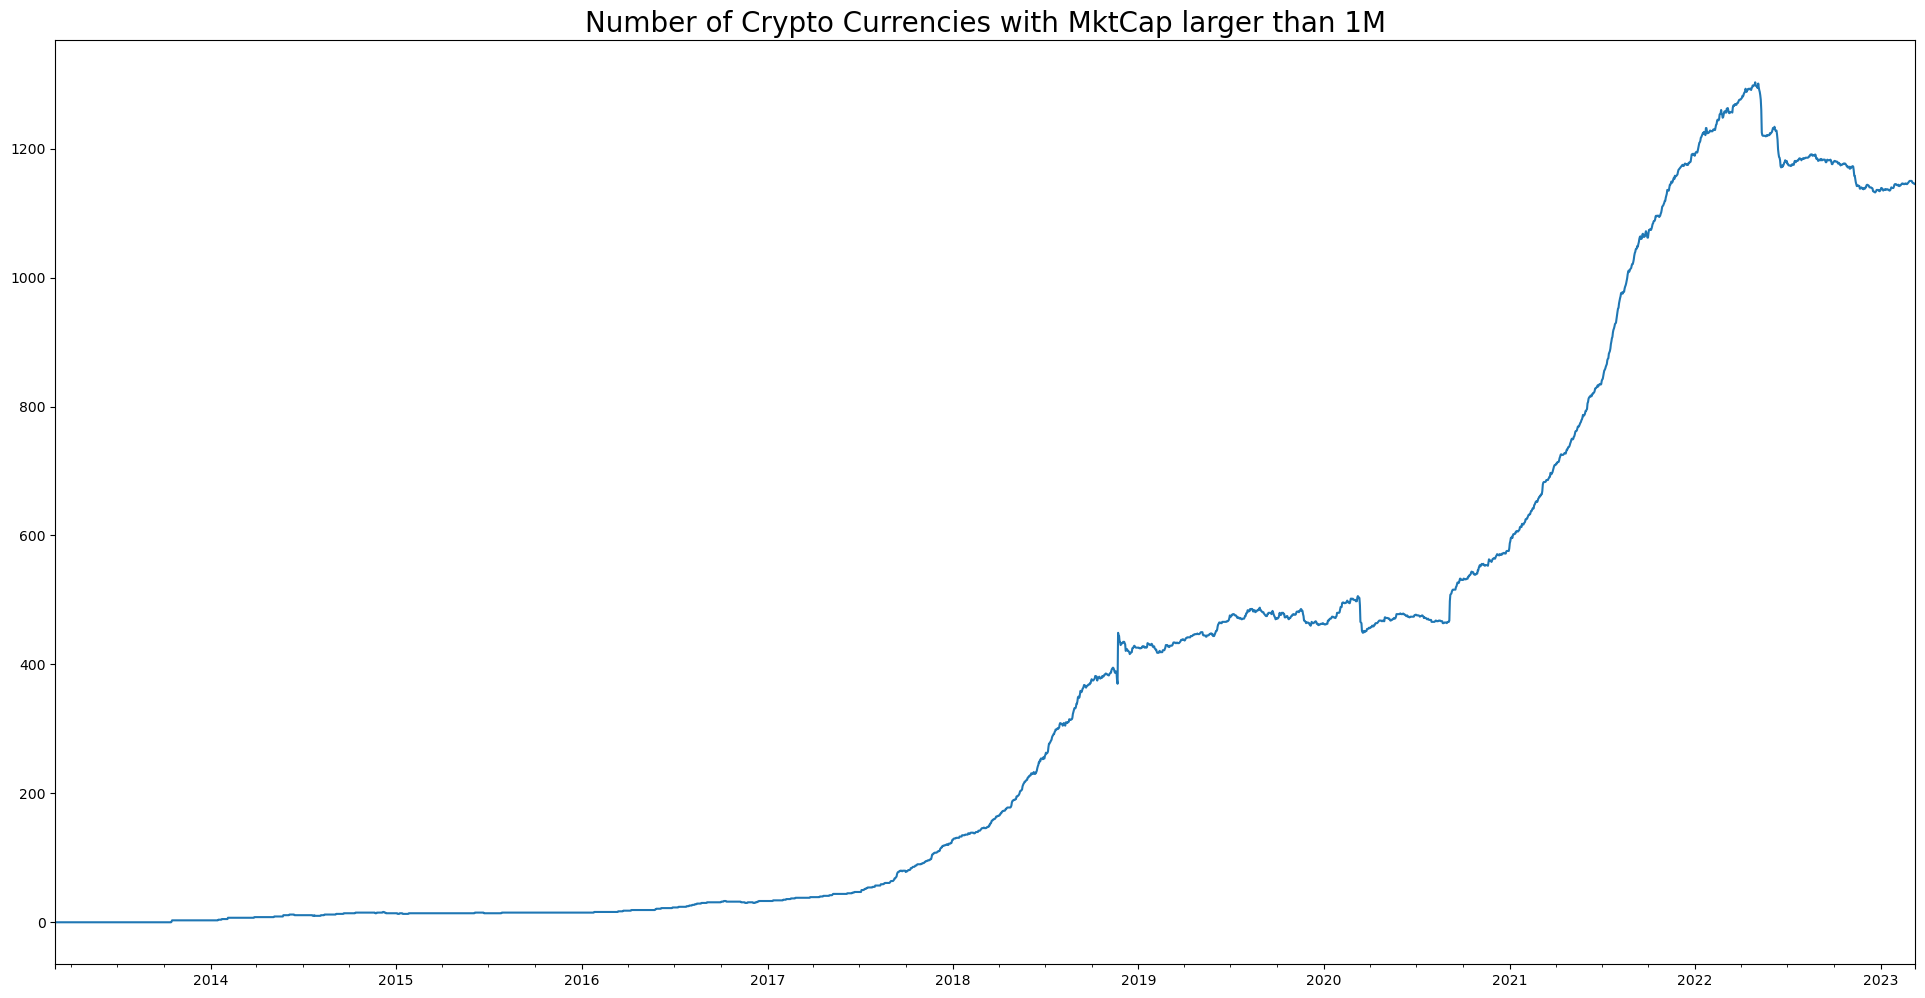

In [83]:
plt.figure()
plt.title("Number of Crypto Currencies with MktCap larger than 1M", size=20)
clean_mktcap.count(1).plot(figsize=(24,12))

In [84]:
for year in ["2013","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023"]:
    numbers = (len(clean_price.columns) - clean_price.loc[year].isna().sum(1)).max()
    tmp_mktcap = clean_mktcap.loc[year]

    if year == "2013":
        print("year", "Number", "Mean", "Median")
    print(year, numbers, tmp_mktcap.mean(axis=0).mean()/1_000_000, tmp_mktcap.median(axis=0).median()/1_000_000)

print('total', (len(clean_price.columns) - clean_price.isna().sum(1)).max(), clean_mktcap.mean(axis=0).mean()/1_000_000, clean_mktcap.median(axis=0).median()/1_000_000)

year Number Mean Median
2013 3 2610.3566947186146 243.5848025
2014 16 368.1887694711793 2.4516285
2015 15 245.35279848982006 6.8526595
2016 33 286.0387800432843 7.6870775
2017 128 927.433087372128 19.67718575
2018 449 466.3658518470891 8.286032
2019 488 316.75063574198896 5.652982
2020 580 432.2580572115016 6.489566
2021 1192 1322.80742527589 15.1263945
2022 1303 689.5432644450589 6.57178925
2023 1150 737.1317691081698 12.900522
total 1303 309.2614561732655 6.054819


In [85]:
clean_price.to_pickle("ryu_price2.pickle")
clean_mktcap.to_pickle("ryu_mktcap2.pickle")